In [2]:
import torch
import math

In [3]:
idx2word, fwm_targets, fwm_losses = torch.load("logs_ptb/losses_FWMRNNv2.pt")

In [4]:
_, lstm_targets, lstm_losses = torch.load("logs_ptb/losses_LSTM.pt")

In [5]:
len(idx2word)

10000

In [6]:
fwm_targets.shape

torch.Size([82429])

In [7]:
fwm_bits = fwm_losses.cpu() / math.log(2) # bits
print(fwm_bits.shape)
print("bits: ", fwm_bits.mean().item())
print("ppl: ", math.exp(fwm_losses.cpu().mean().item()))

torch.Size([82429])
bits:  5.784934997558594
ppl:  55.136444628669935


In [8]:
lstm_targets.shape

torch.Size([82429])

In [9]:
lstm_bits = lstm_losses.cpu() / math.log(2) # bits
print(lstm_bits.shape)
print("bits: ", lstm_bits.mean().item())
print("ppl: ", math.exp(lstm_losses.cpu().mean().item()))

torch.Size([82429])
bits:  5.885777950286865
ppl:  59.12826415829831


In [10]:
(fwm_targets == lstm_targets).all()

tensor(1, device='cuda:0', dtype=torch.uint8)

In [11]:
targets = lstm_targets.cpu()
def translate(tensor):
    return " ".join([idx2word[idx.item()] for idx in tensor])

In [12]:
translate(targets[:50])

"it was n't black monday <eos> but while the new york stock exchange did n't fall apart friday as the dow jones industrial average plunged N points most of it in the final hour it barely managed to stay this side of chaos <eos> some circuit breakers installed after the"

In [13]:
diff = fwm_bits - lstm_bits

negative diff means fwm is better

In [14]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

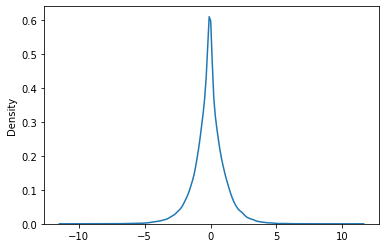

In [15]:
sns.kdeplot(diff.numpy())

In [118]:
import matplotlib.pylab as plt
def text_segment(idx, before=50, after=5):
    if isinstance(idx, torch.Tensor):
        idx = idx.item()
    print("position: ", idx)
    print("word: ", translate(targets[[idx]]))
    print("fwm bits: {:.4f}".format(fwm_bits[idx].item()))
    print("lstm bits: {:.4f}".format(lstm_bits[idx].item()))
    print()
    words = [idx2word[w.item()] 
             for  w in targets[(idx-before):idx+after]]
    fwm = fwm_bits[(idx-before):idx+after]
    lstm = lstm_bits[(idx-before):idx+after]
    diff = fwm - lstm
    
    data = torch.stack([lstm, fwm], dim=1)
    N = (before + after) * 0.5
        
    f, axes = plt.subplots(1, 2, figsize=(3, N), sharey=True)
    #sns.despine(left=True)
    
    # model preds
    xticklabels = ["lstm", "fwm"]
    sns.heatmap(data, cmap='OrRd', ax=axes[0], vmax=15.0, vmin=0.0)
        
    axes[0].set_xticklabels(xticklabels, rotation=0.)    
    axes[0].set_yticklabels(words, rotation=0)
    
    # diff
    sns.heatmap(torch.stack([diff], dim=1), yticklabels=words, cmap='PiYG', ax=axes[1], vmin=-10., vmax=10.)
    axes[1].set_xticklabels(["diff"], rotation=0)
    
    plt.show()
    

Plots the bit loss for different sections of the PTB test set where the difference between the FWM and the LSTM is large.

position:  10887
word:  phillips
fwm bits: 13.8461
lstm bits: 15.4343



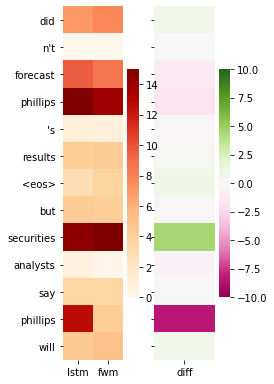

In [130]:
text_segment(10887, before=3, after=10)

position:  10895
word:  phillips
fwm bits: 4.3322
lstm bits: 12.6675



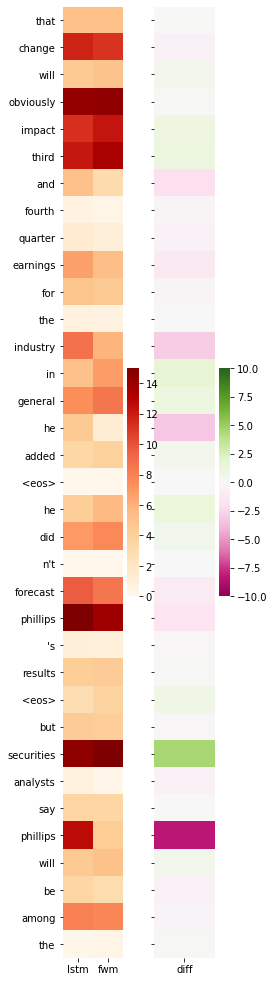

In [129]:
text_segment(10895, before=10, after=5)

position:  7577
word:  rjr
fwm bits: 11.8383
lstm bits: 12.5779



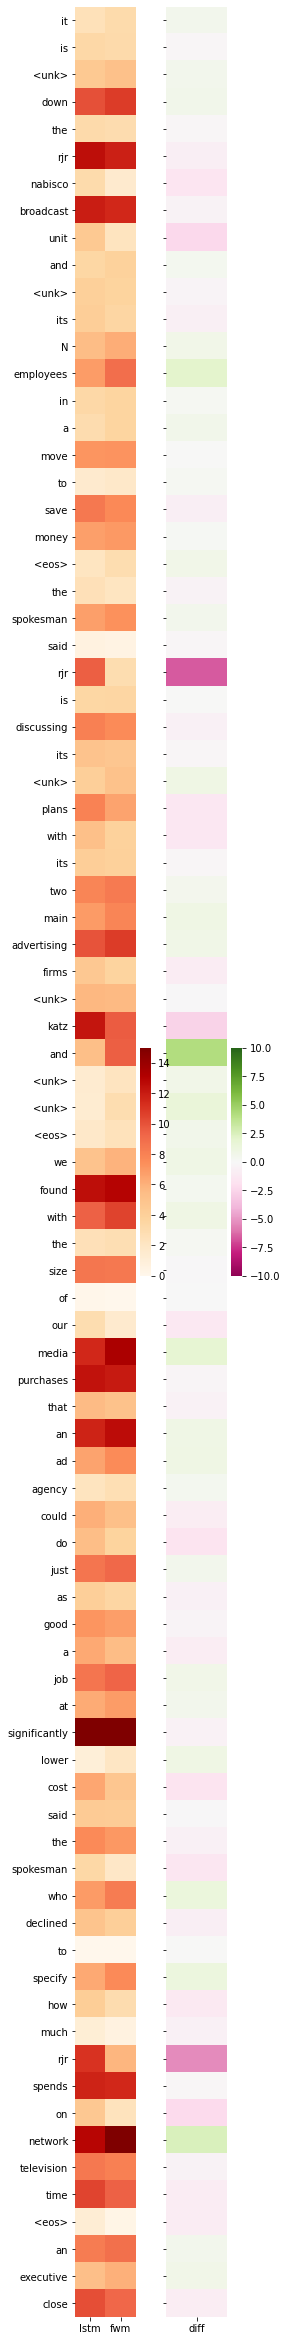

In [127]:
text_segment(7577, before=5, after=80)